In [13]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-193-1 truncated.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,SachCHO,Unnamed: 4,Imine ester in solution,Unnamed: 6,Ester fuel,Unnamed: 8,Unnamed: 9,...,Phenol waste,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Fuel dimer,Alanine waste,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,-420,0.000000,3587.81,6.000000,0.0000,0.000000,1.0,48.000000,0.000,0.000000,...,0.000000,1.0,0.0000,0.0000,0.00,0.000000,0.000000,28702.8,8.000089,--
1,0,7.000000,3150.28,5.727985,149.6030,0.272015,60481.7,46.241968,558.200,0.198017,...,1.331254,95293.4,155.6170,118.3080,4601.23,0.056625,2.202273,25915.6,7.853491,NaN
2,299,11.983333,1416.20,5.832690,40.6234,0.167310,26038.3,45.265974,323.101,0.420449,...,2.172335,42898.5,227.8450,101.2210,3074.49,0.104704,3.180282,11555.2,7.931778,NaN
3,550,16.166667,1431.45,5.830418,41.6348,0.169582,25545.5,44.441289,345.929,0.456946,...,2.956901,41960.1,120.1950,58.1228,3849.67,0.060589,4.013016,11636.3,7.899274,NaN
4,800,20.333333,1411.66,5.860276,33.6576,0.139724,25151.4,43.851426,275.114,0.362297,...,3.668913,41353.2,89.5375,89.0243,4620.87,0.092409,4.796579,11577.2,8.010143,NaN


In [14]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,SachCHO,Unnamed: 4,Imine ester in solution,Unnamed: 6,Fuel,Unnamed: 8,Unnamed: 9,...,Waste,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Fuel dimer,Alanine waste,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,-420,0.000000,3587.81,6.000000,0.0000,0.000000,1.0,48.000000,0.000,0.000000,...,0.000000,1.0,0.0000,0.0000,0.00,0.000000,0.000000,28702.8,8.000089,--
1,0,7.000000,3150.28,5.727985,149.6030,0.272015,60481.7,46.241968,558.200,0.198017,...,1.331254,95293.4,155.6170,118.3080,4601.23,0.056625,2.202273,25915.6,7.853491,NaN
2,299,11.983333,1416.20,5.832690,40.6234,0.167310,26038.3,45.265974,323.101,0.420449,...,2.172335,42898.5,227.8450,101.2210,3074.49,0.104704,3.180282,11555.2,7.931778,NaN
3,550,16.166667,1431.45,5.830418,41.6348,0.169582,25545.5,44.441289,345.929,0.456946,...,2.956901,41960.1,120.1950,58.1228,3849.67,0.060589,4.013016,11636.3,7.899274,NaN
4,800,20.333333,1411.66,5.860276,33.6576,0.139724,25151.4,43.851426,275.114,0.362297,...,3.668913,41353.2,89.5375,89.0243,4620.87,0.092409,4.796579,11577.2,8.010143,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        4.171382e-03 4.996333e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   6
Objective              <symfit.core.objectives.LeastSquares object at 0x7fdcbd407340>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fdcbd407430>

Goodness of fit qualifiers:
chi_squared            0.8884205323892324
objective_value        0.4442102661946162
r_squared              0.9924585491220316


<IPython.core.display.Javascript object>


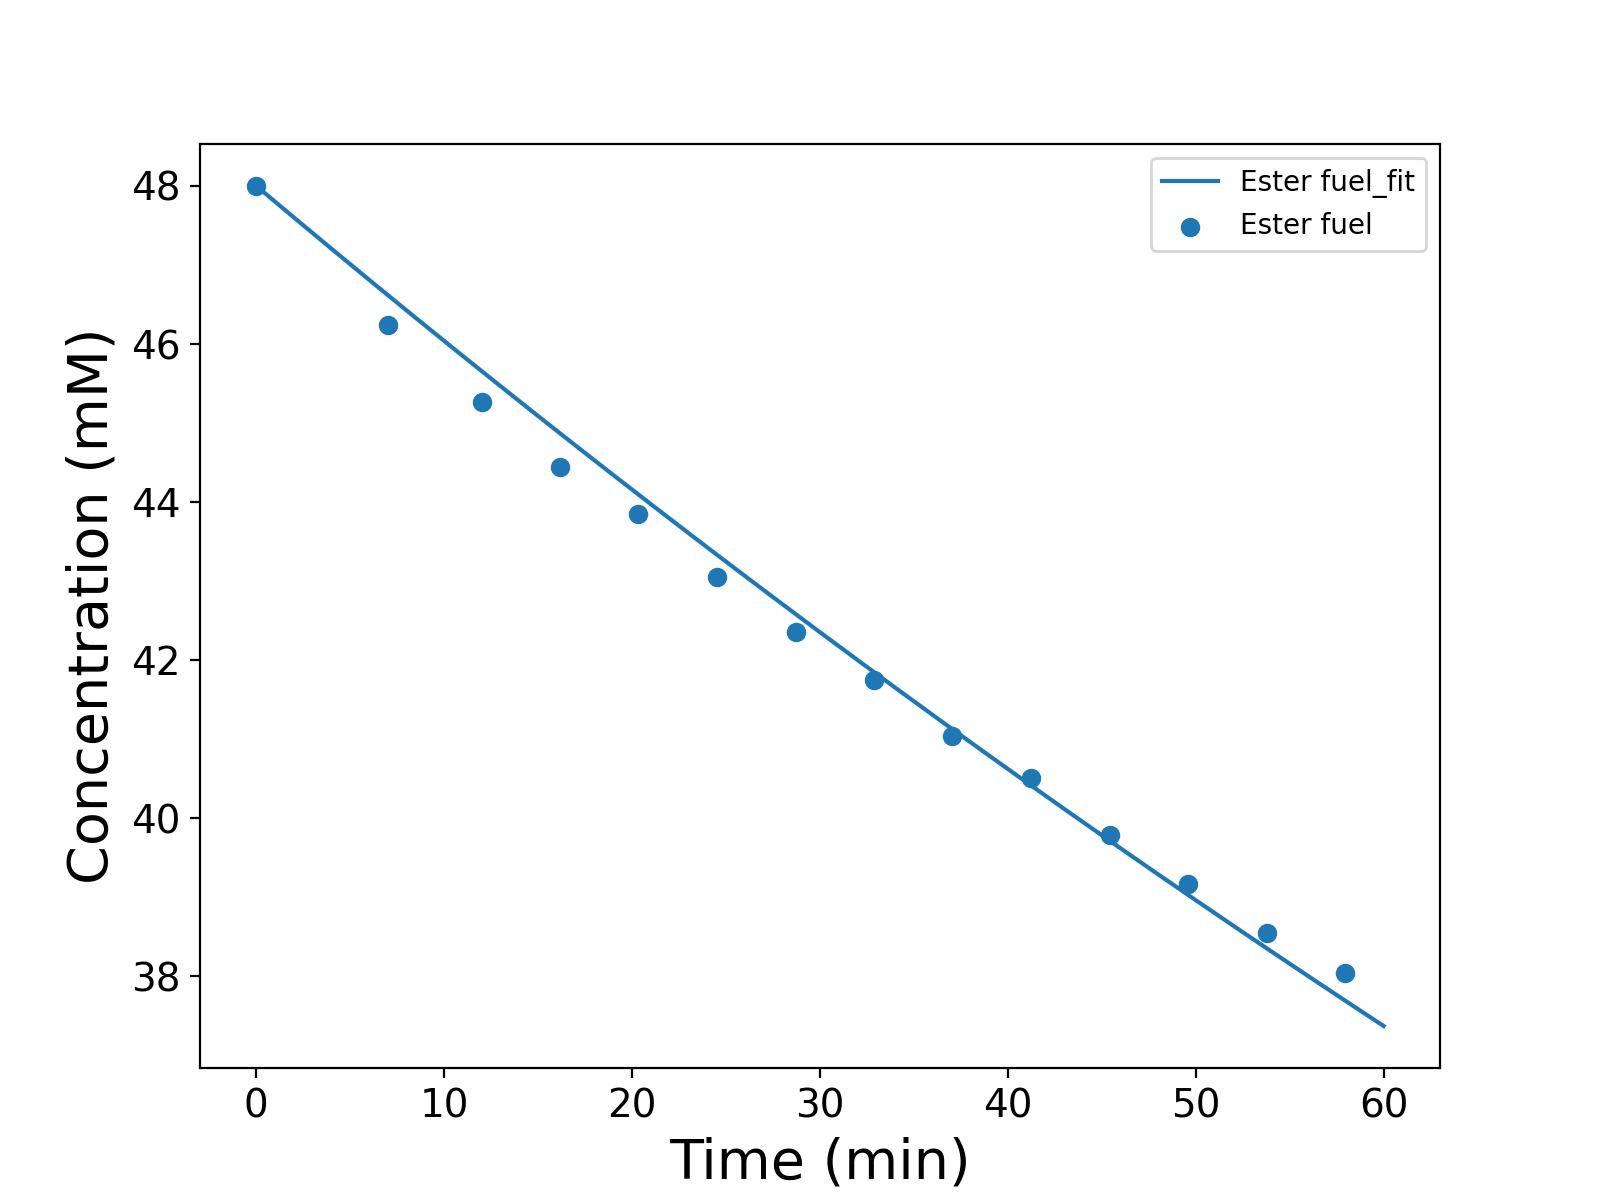

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-193-1 (pH 6.10) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [1]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-198-2 truncated.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,SachCHO,Unnamed: 4,Imine ester in solution,Unnamed: 6,Ester fuel,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Fuel dimer,Alanine waste,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,-360,0.000000,3239.07,6.000000,0.000,0.000000,1.0,48.000000,0.000,0.000000,...,1.0,0.000,0.000,0.000,0.00,0.000000,0.000000,25330.5,7.820300,--
1,0,6.000000,2668.58,5.186039,418.840,0.813961,57977.8,44.308880,1469.080,0.482540,...,90177.4,1121.200,126.926,947.996,7094.20,0.061251,3.423438,24804.5,8.034054,NaN
2,295,10.916667,1212.49,5.284140,164.260,0.715860,23898.6,42.475907,650.480,0.572232,...,38832.4,418.910,172.857,477.103,5115.41,0.184312,5.454416,10815.4,7.855747,NaN
3,545,15.083333,1220.06,5.365838,144.193,0.634162,22862.5,40.858514,635.199,0.619804,...,37283.6,455.550,161.882,456.885,6574.35,0.172934,7.023211,10917.9,8.002841,NaN
4,795,19.250000,1232.86,5.424558,130.783,0.575442,22052.8,39.326720,709.357,0.798545,...,35741.8,336.983,123.422,492.320,8010.99,0.132517,8.601344,10874.1,7.974301,NaN


In [2]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,SachCHO,Unnamed: 4,Imine ester in solution,Unnamed: 6,Fuel,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Fuel dimer,Alanine waste,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,-360,0.000000,3239.07,6.000000,0.000,0.000000,1.0,48.000000,0.000,0.000000,...,1.0,0.000,0.000,0.000,0.00,0.000000,0.000000,25330.5,7.820300,--
1,0,6.000000,2668.58,5.186039,418.840,0.813961,57977.8,44.308880,1469.080,0.482540,...,90177.4,1121.200,126.926,947.996,7094.20,0.061251,3.423438,24804.5,8.034054,NaN
2,295,10.916667,1212.49,5.284140,164.260,0.715860,23898.6,42.475907,650.480,0.572232,...,38832.4,418.910,172.857,477.103,5115.41,0.184312,5.454416,10815.4,7.855747,NaN
3,545,15.083333,1220.06,5.365838,144.193,0.634162,22862.5,40.858514,635.199,0.619804,...,37283.6,455.550,161.882,456.885,6574.35,0.172934,7.023211,10917.9,8.002841,NaN
4,795,19.250000,1232.86,5.424558,130.783,0.575442,22052.8,39.326720,709.357,0.798545,...,35741.8,336.983,123.422,492.320,8010.99,0.132517,8.601344,10874.1,7.974301,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        9.297532e-03 1.508055e-04
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   7
Objective              <symfit.core.objectives.LeastSquares object at 0x7fe68c12cdf0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fe68c12cf70>

Goodness of fit qualifiers:
chi_squared            5.000168221509206
objective_value        2.500084110754603
r_squared              0.9881929545782073


<IPython.core.display.Javascript object>


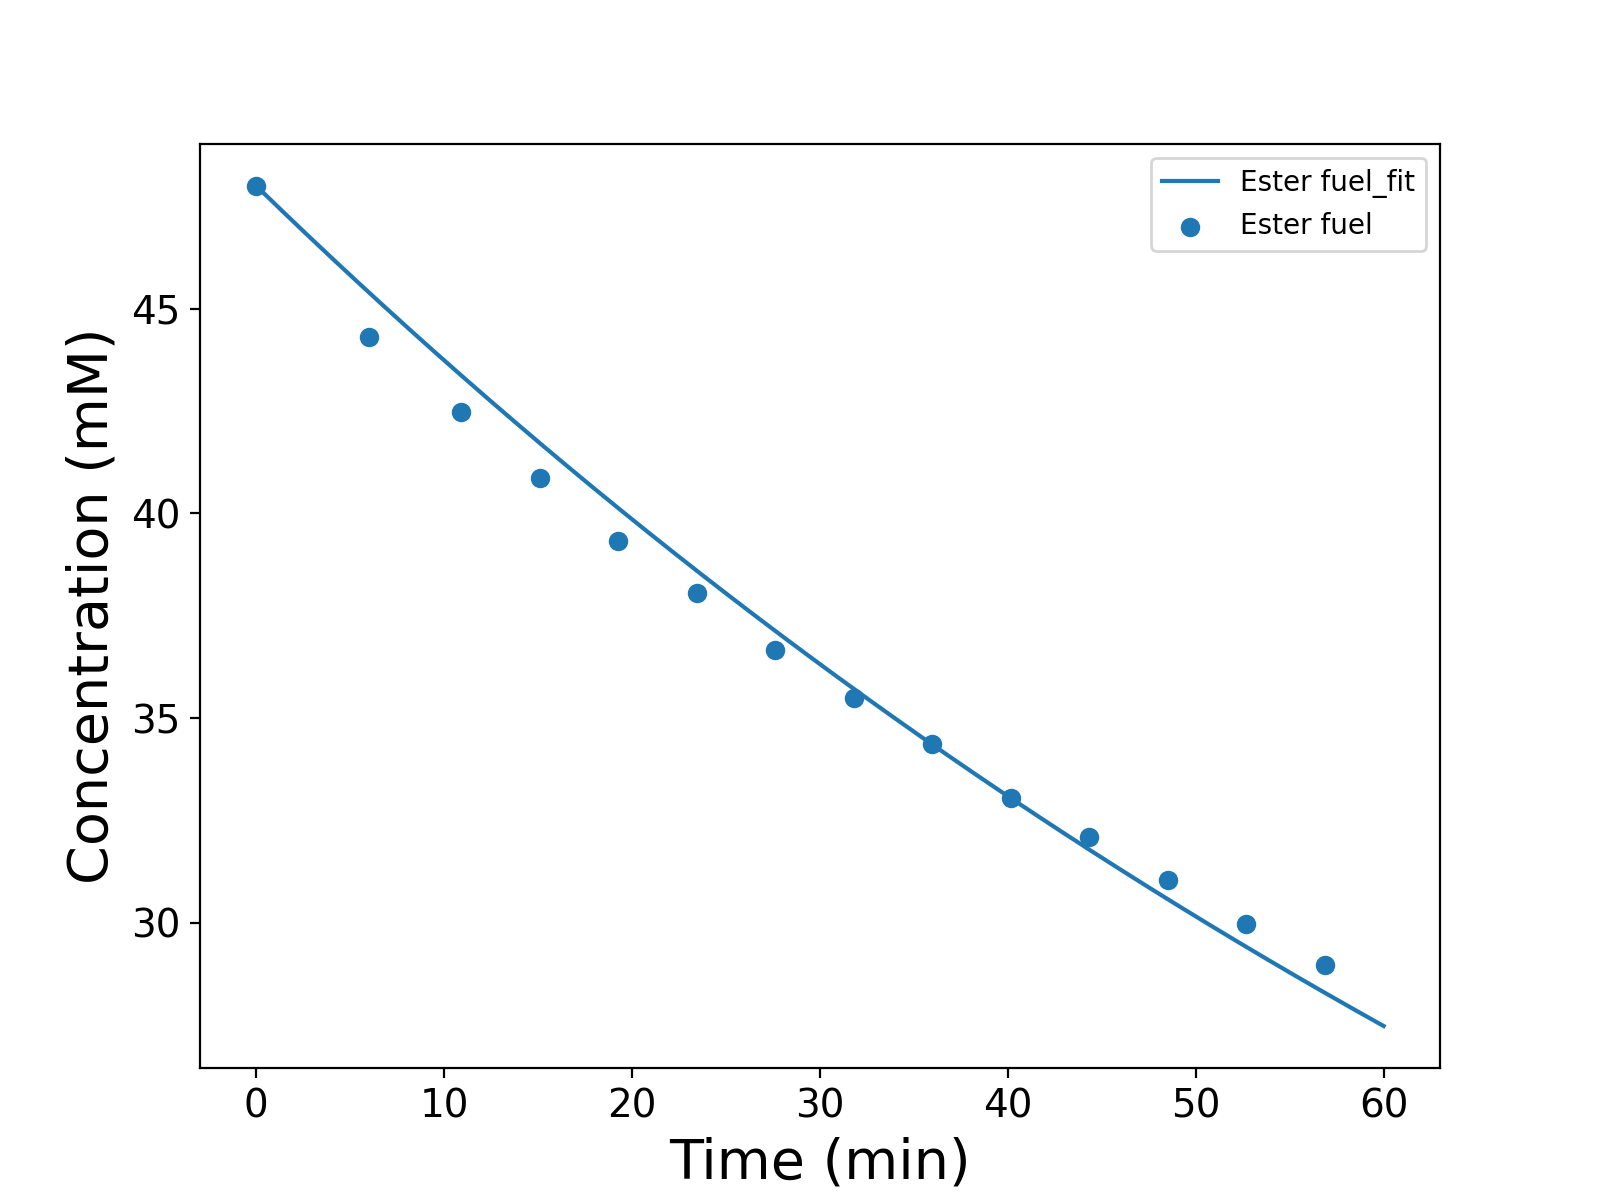

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-198-2 (pH 6.55) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [4]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-193-2 truncated.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,SachCHO,Unnamed: 4,Imine ester in solution,Unnamed: 6,Imine ester assembly that precipitated,Unnamed: 8,Ester fuel,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Fuel dimer,Alanine waste,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,-420,0.000000,3082.790,5.999999,0.000,0.000000,0.000522,0.000001,1.0,47.949957,...,1.0,0.000,0.000,0.000,0.00,0.000000,0.000000,27397.9,8.887372,--
1,0,7.000000,1765.620,3.777981,899.700,1.925131,138.749145,0.296888,53485.7,40.556462,...,82946.6,3026.660,590.457,1235.790,10661.40,0.287850,5.197466,24920.8,9.350022,NaN
2,294,11.900000,774.608,3.752032,334.781,1.621606,129.312663,0.626362,21534.0,37.682118,...,34835.0,1091.200,350.879,610.905,7332.70,0.380867,7.959388,11008.8,9.923300,NaN
3,545,16.083333,795.868,3.857604,315.522,1.529348,126.479021,0.613049,20200.3,35.765274,...,32724.2,818.145,414.905,720.328,9271.32,0.453150,10.125928,11001.4,9.898775,NaN
4,796,20.266667,811.642,3.924714,259.046,1.252623,170.129025,0.822663,19015.2,33.873164,...,30876.4,872.402,591.352,815.704,11017.40,0.642581,11.971841,11027.6,10.299546,NaN


In [5]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,SachCHO,Unnamed: 4,Imine ester in solution,Unnamed: 6,Imine ester assembly that precipitated,Unnamed: 8,Fuel,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Fuel dimer,Alanine waste,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,-420,0.000000,3082.790,5.999999,0.000,0.000000,0.000522,0.000001,1.0,47.949957,...,1.0,0.000,0.000,0.000,0.00,0.000000,0.000000,27397.9,8.887372,--
1,0,7.000000,1765.620,3.777981,899.700,1.925131,138.749145,0.296888,53485.7,40.556462,...,82946.6,3026.660,590.457,1235.790,10661.40,0.287850,5.197466,24920.8,9.350022,NaN
2,294,11.900000,774.608,3.752032,334.781,1.621606,129.312663,0.626362,21534.0,37.682118,...,34835.0,1091.200,350.879,610.905,7332.70,0.380867,7.959388,11008.8,9.923300,NaN
3,545,16.083333,795.868,3.857604,315.522,1.529348,126.479021,0.613049,20200.3,35.765274,...,32724.2,818.145,414.905,720.328,9271.32,0.453150,10.125928,11001.4,9.898775,NaN
4,796,20.266667,811.642,3.924714,259.046,1.252623,170.129025,0.822663,19015.2,33.873164,...,30876.4,872.402,591.352,815.704,11017.40,0.642581,11.971841,11027.6,10.299546,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        1.521849e-02 4.215873e-04
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   8
Objective              <symfit.core.objectives.LeastSquares object at 0x7fdcbd3f6be0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fdcbd3f6c40>

Goodness of fit qualifiers:
chi_squared            24.850551749182728
objective_value        12.425275874591364
r_squared              0.9670775602194847


<IPython.core.display.Javascript object>


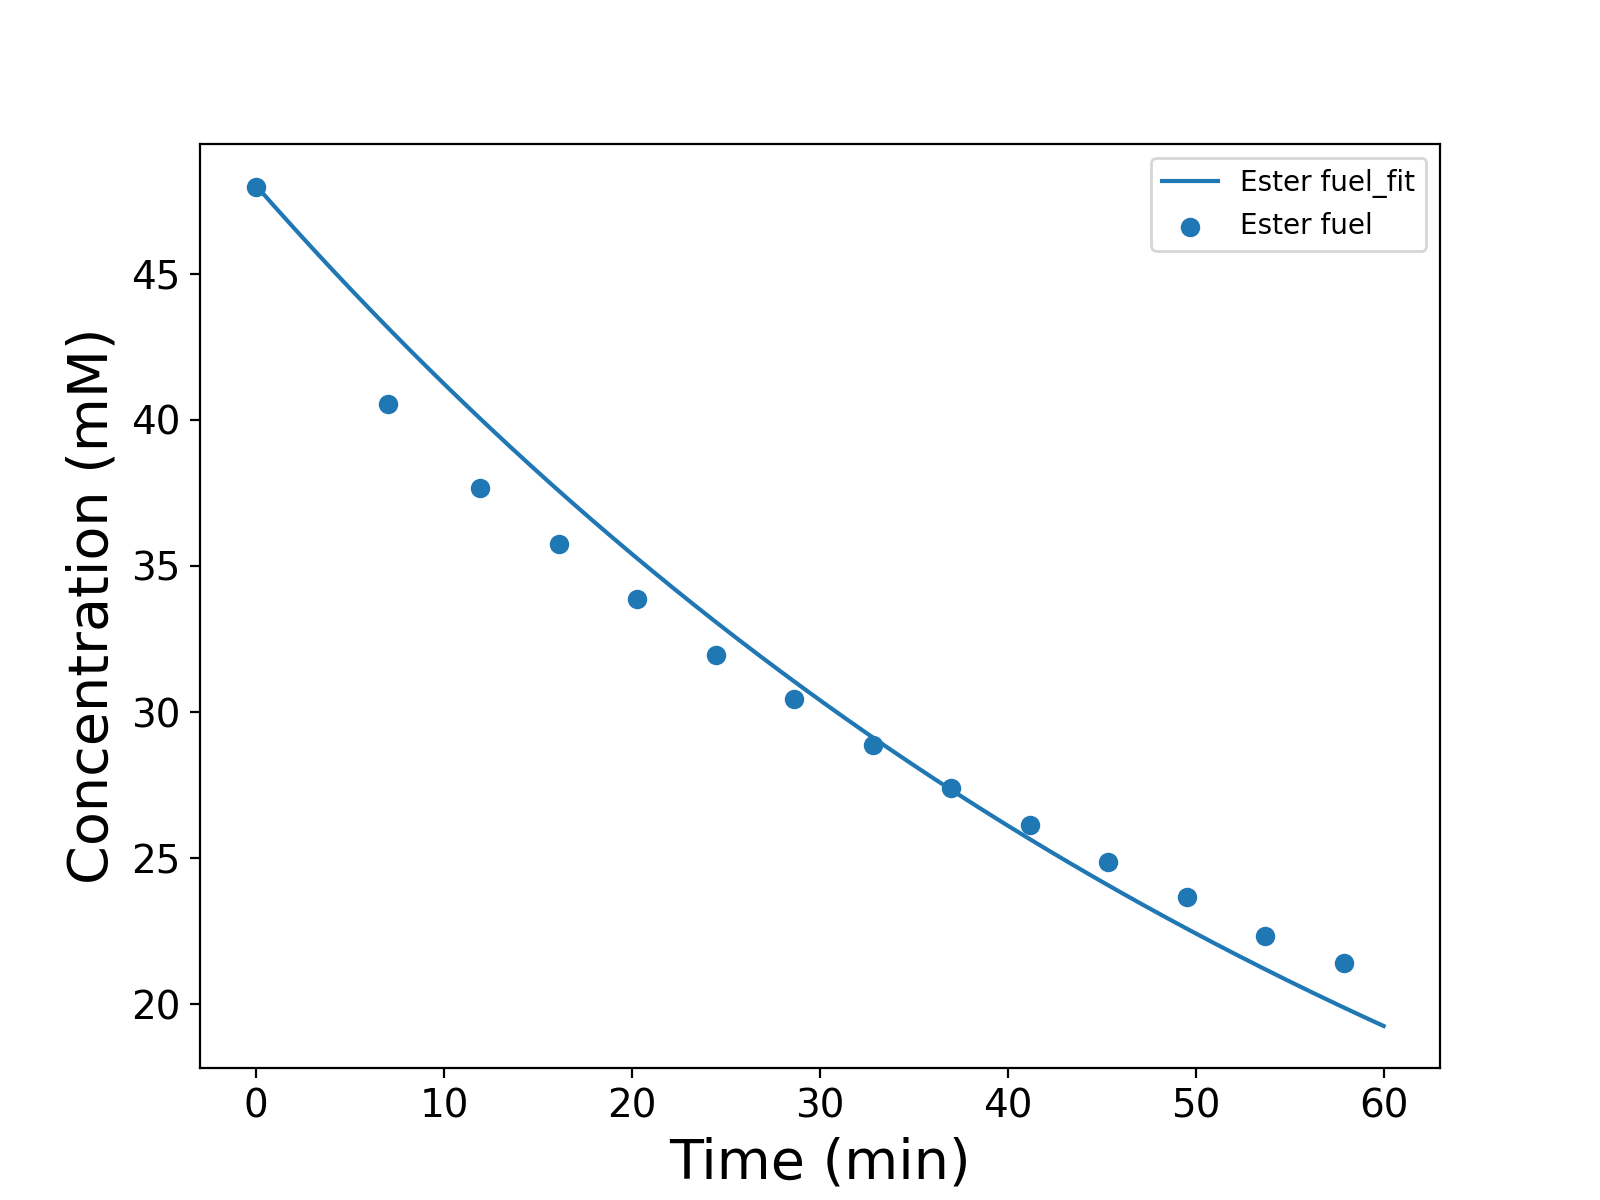

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-193-2 (pH 7.00) based on concentration. The concentration was calculated WITH an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [7]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-193-3 truncated.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,SachCHO,Unnamed: 4,Imine ester in solution,Unnamed: 6,Other imines,Unnamed: 8,Byproducts,...,Imine ester assembly that precipitated,Unnamed: 12,Ester fuel,Unnamed: 14,Fuel dimer,Unnamed: 16,Phenol waste,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,-360,0.000000,3028.8400,6.000001,0.000,0.000000,0.0000,0.000000,0.0000,0.000000,...,-7.107258e-07,1.00,48.034468,0.00,0.000000,0.00,0.000000,26160.3,8.637069,--
1,0,6.000000,70.5387,0.163965,380.920,0.885437,43.2619,0.100561,19.8680,0.046183,...,4.803855e+00,32678.40,29.214688,2771.02,1.796219,14108.20,12.612816,22294.3,43.324512,NaN
2,298,10.966667,28.5710,0.131127,169.234,0.776701,45.4199,0.208455,31.5682,0.144882,...,4.738835e+00,12897.40,23.423845,1811.79,2.675800,9655.01,17.535120,11291.5,41.090915,NaN
3,549,15.150000,55.7590,0.254929,147.989,0.676602,64.4068,0.294466,38.5745,0.176362,...,4.597641e+00,10632.00,19.432541,2028.80,3.167150,11589.90,21.183334,11334.8,36.953757,NaN
4,800,19.333333,52.5526,0.240248,123.481,0.564502,59.9171,0.273915,31.8441,0.145578,...,4.775757e+00,8836.06,16.203237,2152.80,3.494855,13097.50,24.017706,11335.8,42.330172,NaN


In [8]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,SachCHO,Unnamed: 4,Imine ester in solution,Unnamed: 6,Other imines,Unnamed: 8,Byproducts,...,Imine ester assembly that precipitated,Unnamed: 12,Fuel,Unnamed: 14,Fuel dimer,Unnamed: 16,Waste,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,-360,0.000000,3028.8400,6.000001,0.000,0.000000,0.0000,0.000000,0.0000,0.000000,...,-7.107258e-07,1.00,48.034468,0.00,0.000000,0.00,0.000000,26160.3,8.637069,--
1,0,6.000000,70.5387,0.163965,380.920,0.885437,43.2619,0.100561,19.8680,0.046183,...,4.803855e+00,32678.40,29.214688,2771.02,1.796219,14108.20,12.612816,22294.3,43.324512,NaN
2,298,10.966667,28.5710,0.131127,169.234,0.776701,45.4199,0.208455,31.5682,0.144882,...,4.738835e+00,12897.40,23.423845,1811.79,2.675800,9655.01,17.535120,11291.5,41.090915,NaN
3,549,15.150000,55.7590,0.254929,147.989,0.676602,64.4068,0.294466,38.5745,0.176362,...,4.597641e+00,10632.00,19.432541,2028.80,3.167150,11589.90,21.183334,11334.8,36.953757,NaN
4,800,19.333333,52.5526,0.240248,123.481,0.564502,59.9171,0.273915,31.8441,0.145578,...,4.775757e+00,8836.06,16.203237,2152.80,3.494855,13097.50,24.017706,11335.8,42.330172,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        5.558323e-02 2.293499e-03
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   4
Objective              <symfit.core.objectives.LeastSquares object at 0x7fdcbd3f66d0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fdca808a910>

Goodness of fit qualifiers:
chi_squared            51.37416222221872
objective_value        25.68708111110936
r_squared              0.9742686276279005


<IPython.core.display.Javascript object>


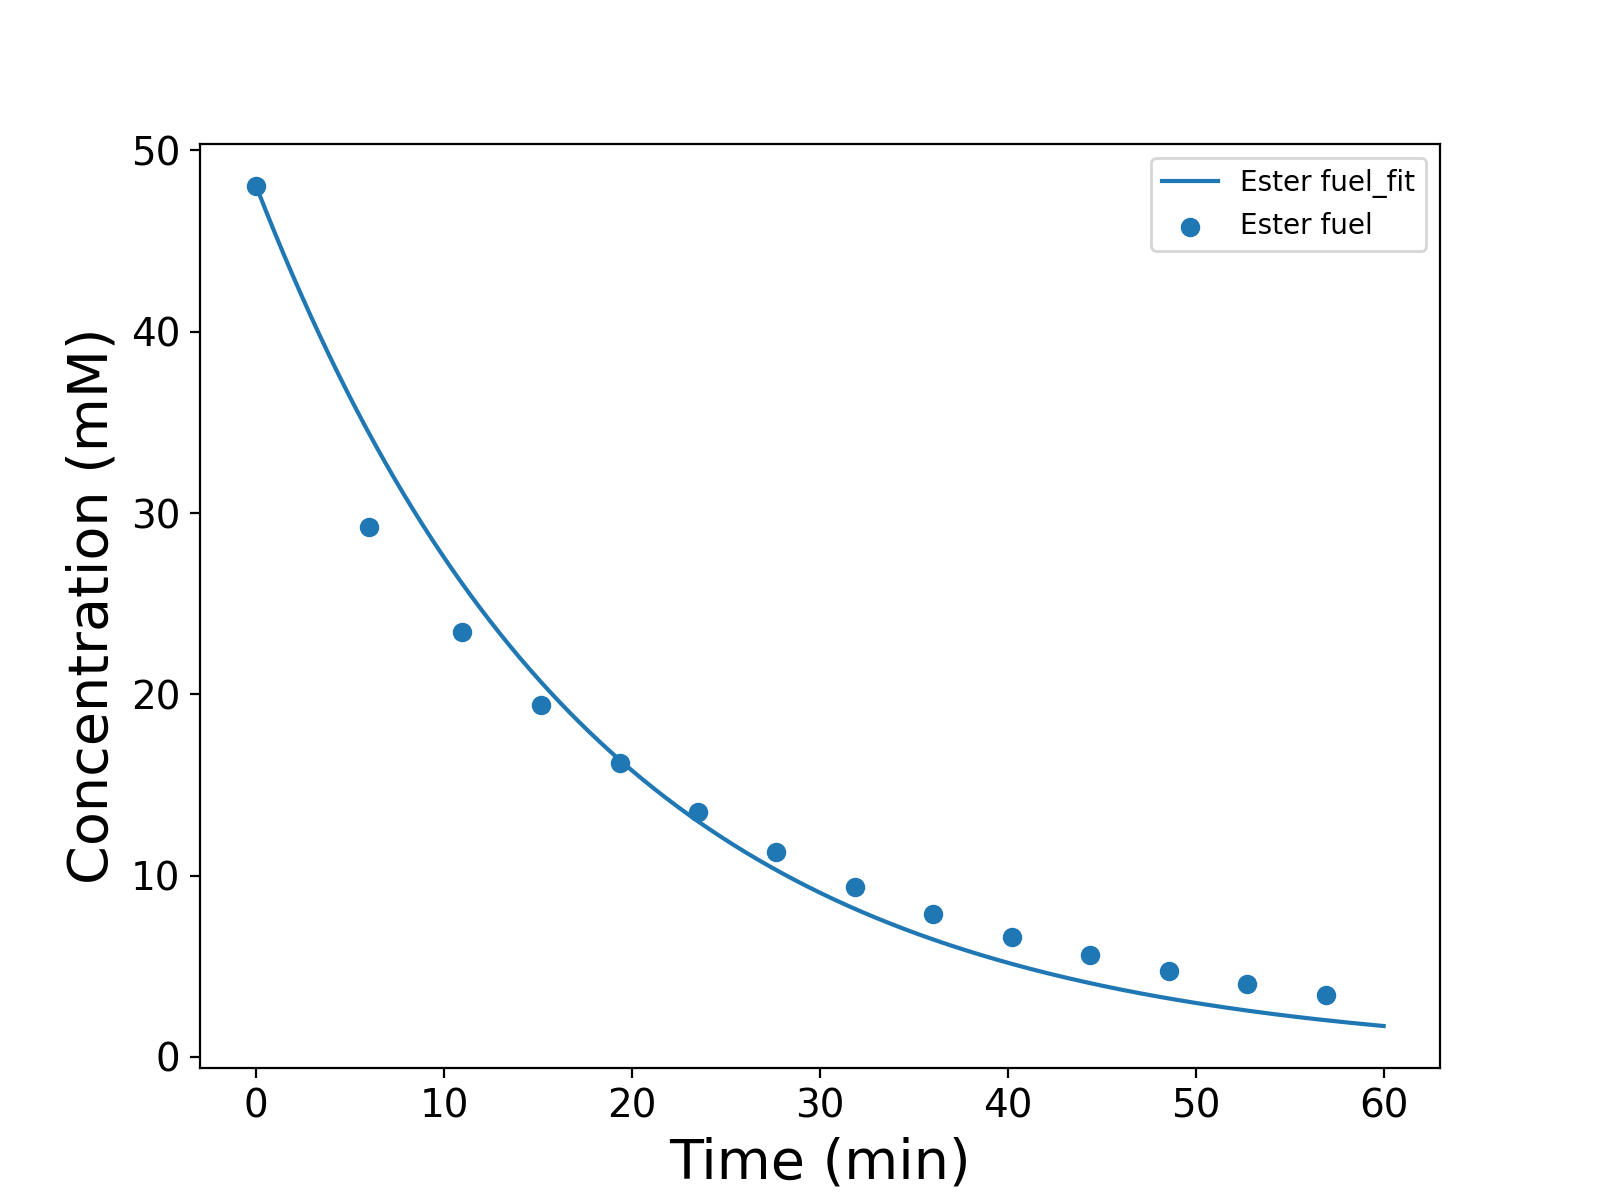

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-193-3 (pH 7.90) based on concentration. The concentration was calculated WITH an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()